<a href="https://colab.research.google.com/github/thiunuwan/Chronic-Kidney-Disease-Classification/blob/main/CM4310_Artificial_Neural_Networks_%26_Evolutionary_Computing_204219N.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**CM4310 - Artificial Neural Networks & Evolutionary Computing Assignment**  

Index Number :204219N

Link to GoogleColab Notebook : [https://colab.research.google.com/drive/1HqX1Pbd7si9AwbNYtwds557AlVA8XD7e#scrollTo=kLCccorjCphF](https://colab.research.google.com/drive/1HqX1Pbd7si9AwbNYtwds557AlVA8XD7e#scrollTo=kLCccorjCphF)

---

### Objectives
- Preprocess the dataset to handle missing values and remove noise.
- Classify the dataset using a Multilayer Perceptron (MLP) with one hidden layer.
- Evaluate the model and analyze the effects of hyperparameters.

##**Section 1:Installing Necessary Libraries**


In [ ]:
# Install ucimlrepo and matplotlib-venn quietly
!pip install -q ucimlrepo
!pip install -q matplotlib-venn


##**Section 2:Importing Libraries**

We will use the following libraries in this project:
- `numpy`: For numerical operations.
- `pandas`: For data manipulation and analysis.
- `sklearn`: For machine learning algorithms and evaluation.
- `ucimlrepo`: To fetch datasets directly from the UCI Machine Learning Repository.
- `missingno`: For visualizing missing data in datasets.
- `seaborn (sns)`: For statistical data visualization, built on top of matplotlib.
- `tqdm`: For adding progress bars to loops and iterations, useful in monitoring long-running processes.

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, mean_squared_error, accuracy_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
import missingno as msno
import seaborn as sns
from tqdm.notebook import tqdm
import math
import warnings
from IPython.display import display, Markdown

##**Section 3: Dataset Loading and Exploration**
In this section, we:
* Loaded the Chronic Kidney Disease dataset.
* Displayed an overview of the dataset (shape, first few rows, data types).
* Examined missing values /duplicate  entries and data distributions.
* Visualized the distributions of numeric and categorical features.

**Fetch or Load the Dataset**

In [ ]:
#Fetch the Chronic Kidney Disease dataset
chronic_kidney_disease = fetch_ucirepo(id=336)

#Load the data into a Pandas DataFrame
df = pd.DataFrame(chronic_kidney_disease.data.features, columns=chronic_kidney_disease.feature_names)
df['target'] = chronic_kidney_disease.data.targets

**Display Basic Dataset Information**


In [ ]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,target
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [ ]:
print("Dataset Shape:", df.shape)


Dataset Shape: (400, 25)


**Data Types and Memory Usage**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     329 non-null    float64
 16  wbcc    294 non-null    float64
 17  rbcc    269 non-null    float64
 18  htn     398 non-null    object 
 19  dm      398 non-null    object 
 20  cad     398 non-null    object 
 21  appet   399 non-null    object 
 22  pe

**Summary Statistics**

In [ ]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


**Identify Missing Values**

In [ ]:
# Count missing values in each column:
print("Missing Values:\n", df.isnull().sum())

Missing Values:
 age         9
bp         12
sg         47
al         46
su         49
rbc       152
pc         65
pcc         4
ba          4
bgr        44
bu         19
sc         17
sod        87
pot        88
hemo       52
pcv        71
wbcc      106
rbcc      131
htn         2
dm          2
cad         2
appet       1
pe          1
ane         1
target      0
dtype: int64


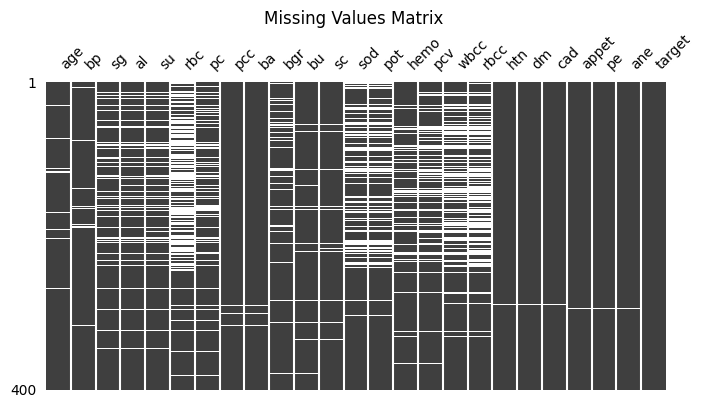

In [ ]:
# Visualizing missing values

fig, ax = plt.subplots(figsize=(8, 4))
msno.matrix(df, ax=ax, sparkline=False)
plt.title("Missing Values Matrix ", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=10)
plt.show()


**Identify Duplicates**

In [ ]:
#Check for duplicate entries:
print("Duplicates:", df.duplicated().sum())

Duplicates: 0


**Identify Outliers**

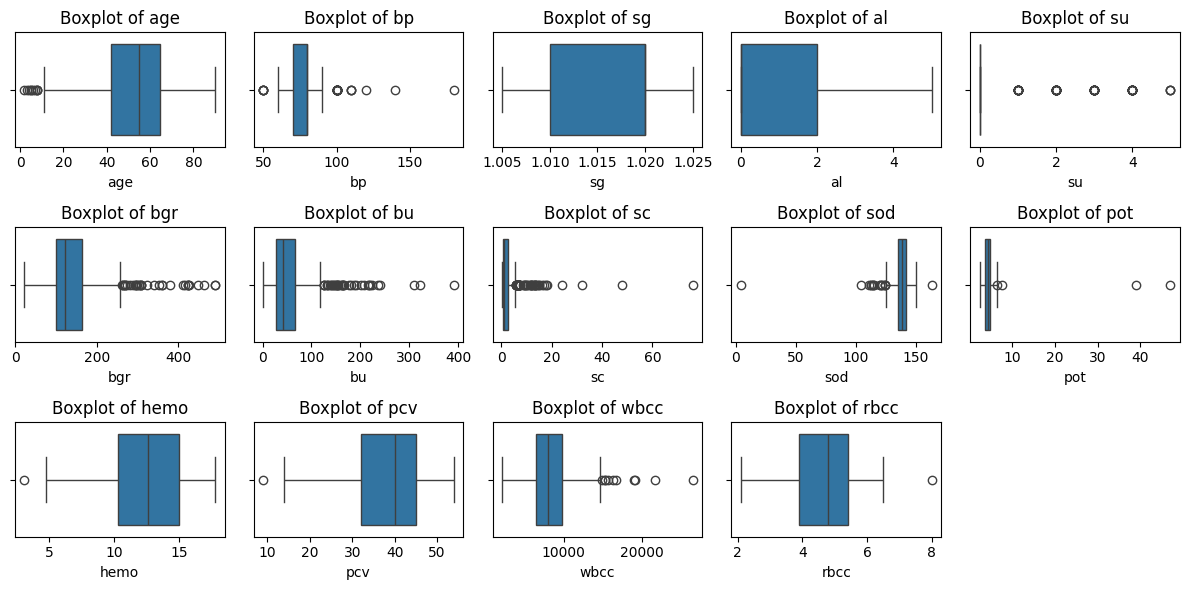

In [ ]:
plt.figure(figsize=(12, 6))

# Calculate the number of rows and columns for the subplots
numeric_cols = df.select_dtypes(include=[np.number]).columns
num_plots = len(numeric_cols)
num_cols = 5
num_rows = (num_plots // num_cols) + (1 if num_plots % num_cols != 0 else 0)

# Plot boxplots dynamically based on the number of features
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**Data Distribution**

1. Numerical Features:
Visualize the distribution of numerical features



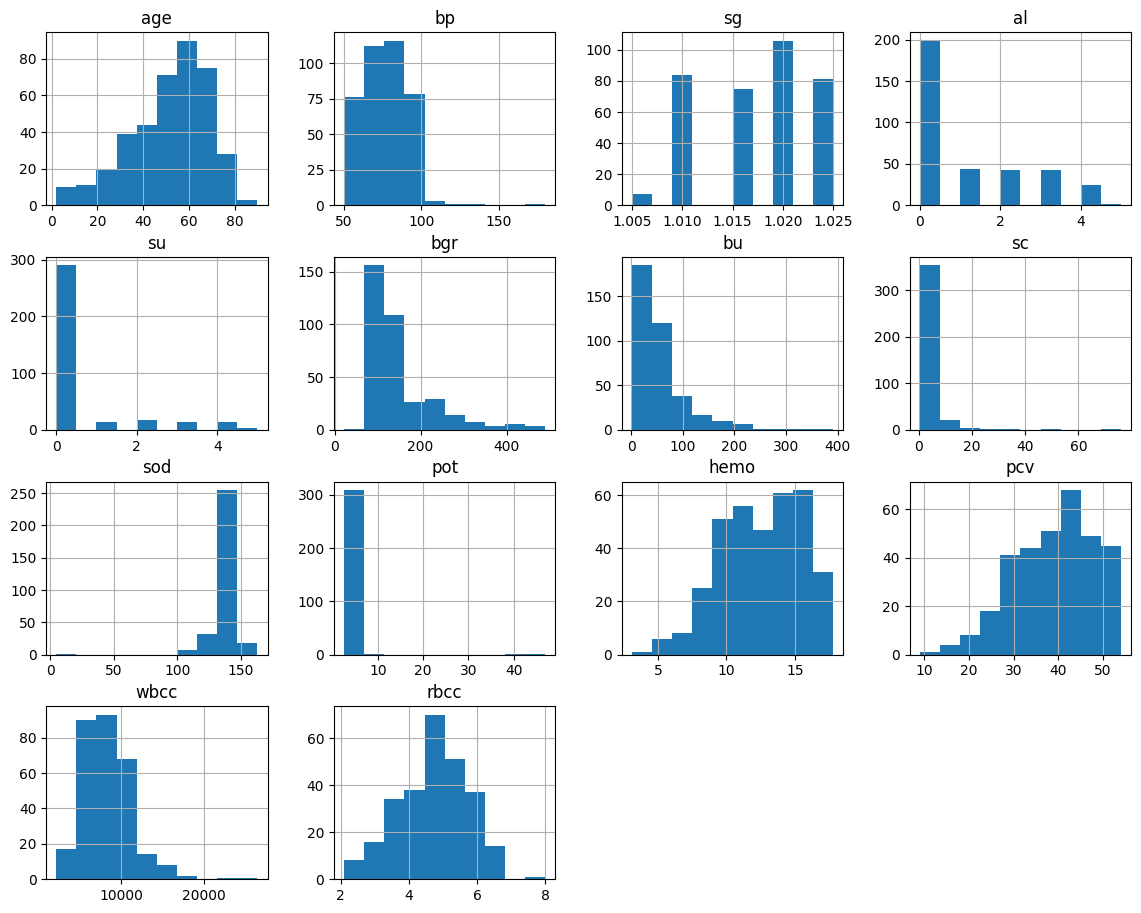

In [ ]:
# Visualize the distribution of numerical features
df.hist(figsize=(14, 11))
plt.show()

2.Categorical Features:
Visualize the frequency distribution of categorical features

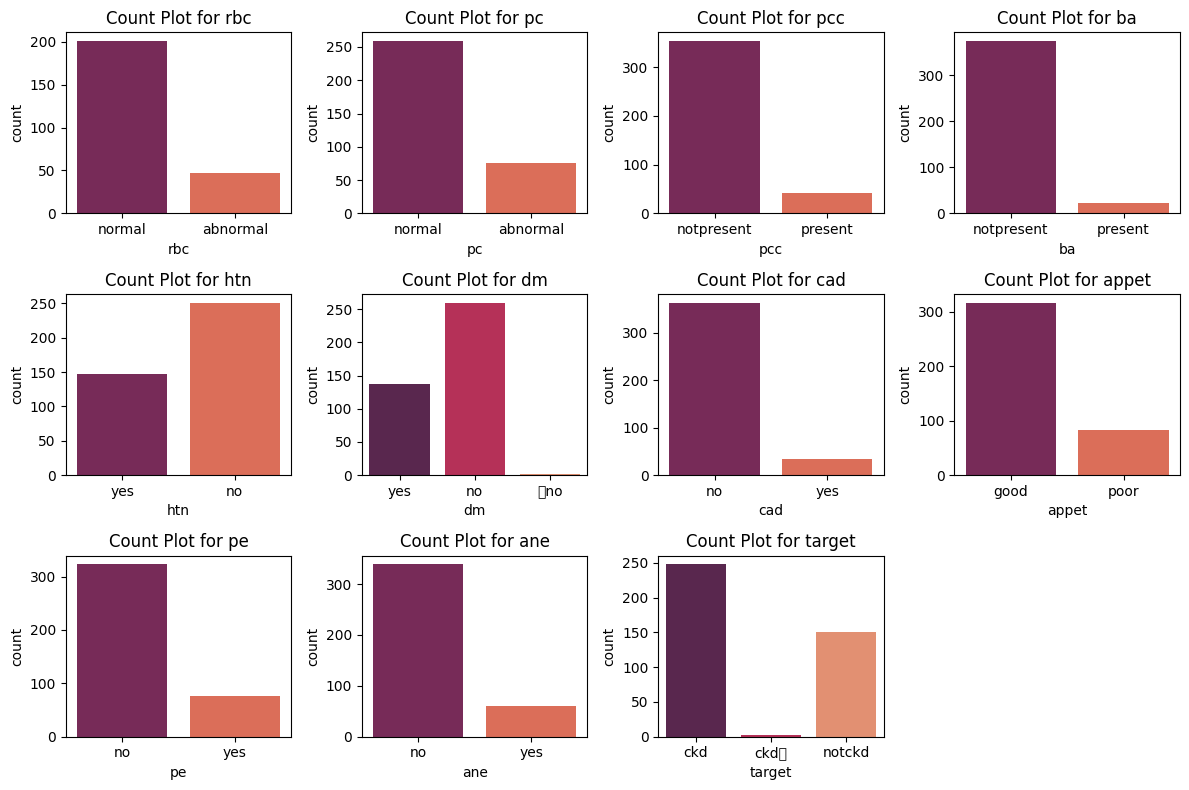

In [ ]:
# Visualize the frequency distribution of categorical features

# Get all categorical columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns
warnings.filterwarnings("ignore", category=UserWarning, message=".*Glyph 9.*")
plt.figure(figsize=(12,8))
plotnumber = 1

for column in categorical_cols:
    if plotnumber <= len(categorical_cols):
        ax = plt.subplot(3, 4, plotnumber)
        sns.countplot(x=column, data=df, palette='rocket', hue=column, legend=False)
        plt.xlabel(column)
        plt.title(f"Count Plot for {column}")
        plotnumber += 1

plt.tight_layout()
plt.show()


##**Section 4: Data Preprocessing**

In this section, we:
- Handle missing values by filling them with appropriate statistics (mean/median/mode)
- Standardize numerical features
- Encode categorical variables into numerical format for compatibility with the model.
- Split the dataset into training and testing sets for model evaluation.


**Handle Missing Values**

In [ ]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(exclude=[np.number]).columns

# Impute numeric columns with the mean
imputer_numeric = SimpleImputer(strategy='mean')
df[numeric_cols] = imputer_numeric.fit_transform(df[numeric_cols])

# Impute categorical/boolean columns with the most frequent value
imputer_categorical = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer_categorical.fit_transform(df[categorical_cols])

# Check if any missing values remain after imputation
print("Check Missing Values (After imputation):\n", df.isnull().sum())

Check Missing Values (After imputation):
 age       0
bp        0
sg        0
al        0
su        0
rbc       0
pc        0
pcc       0
ba        0
bgr       0
bu        0
sc        0
sod       0
pot       0
hemo      0
pcv       0
wbcc      0
rbcc      0
htn       0
dm        0
cad       0
appet     0
pe        0
ane       0
target    0
dtype: int64


**Handle Outliers**

In [ ]:
# Detecting outliers using IQR (Interquartile Range)
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Create a boolean DataFrame to identify outliers
outliers_condition = (df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)

# Count outliers per feature
outliers_count = outliers_condition.sum()
print("Outliers count per feature:")
print(outliers_count)

Outliers count per feature:
age     10
bp      36
sg       7
al       0
su      48
bgr     53
bu      41
sc      44
sod     18
pot     14
hemo     2
pcv      6
wbcc    17
rbcc    75
dtype: int64


In [ ]:
# Check summary statistics before replacing outliers
print("Summary Statistics Before Replacement:")
print(df[numeric_cols].describe())

Summary Statistics Before Replacement:
              age          bp          sg          al          su         bgr  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    51.483376   76.469072    1.017408    1.016949    0.450142  148.036517   
std     16.974966   13.476298    0.005369    1.272318    1.029487   74.782634   
min      2.000000   50.000000    1.005000    0.000000    0.000000   22.000000   
25%     42.000000   70.000000    1.015000    0.000000    0.000000  101.000000   
50%     54.000000   78.234536    1.017408    1.000000    0.000000  126.000000   
75%     64.000000   80.000000    1.020000    2.000000    0.450142  150.000000   
max     90.000000  180.000000    1.025000    5.000000    5.000000  490.000000   

               bu          sc         sod         pot        hemo         pcv  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    57.425722    3.072454  137.528754    4.627244   12.526437   3

In [ ]:
# Replace outliers with the lower or upper bound values
for col in numeric_cols:
    df[col] = np.where(df[col] < lower_bound[col], lower_bound[col], df[col])
    df[col] = np.where(df[col] > upper_bound[col], upper_bound[col], df[col])

In [ ]:
# Check summary statistics after replacing outliers
print("Summary Statistics After Replacement:")
print(df[numeric_cols].describe())

Summary Statistics After Replacement:
              age          bp          sg          al          su         bgr  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    51.568376   75.719072    1.017452    1.016949    0.222685  136.985267   
std     16.748312   10.947479    0.005277    1.272318    0.400131   46.028992   
min      9.000000   55.000000    1.007500    0.000000    0.000000   27.500000   
25%     42.000000   70.000000    1.015000    0.000000    0.000000  101.000000   
50%     54.000000   78.234536    1.017408    1.000000    0.000000  126.000000   
75%     64.000000   80.000000    1.020000    2.000000    0.450142  150.000000   
max     90.000000   95.000000    1.025000    5.000000    1.125356  223.500000   

               bu          sc         sod         pot        hemo         pcv  \
count  400.000000  400.000000  400.000000  400.000000  400.000000  400.000000   
mean    51.010409    2.254129  138.115004    4.432744   12.532937   38

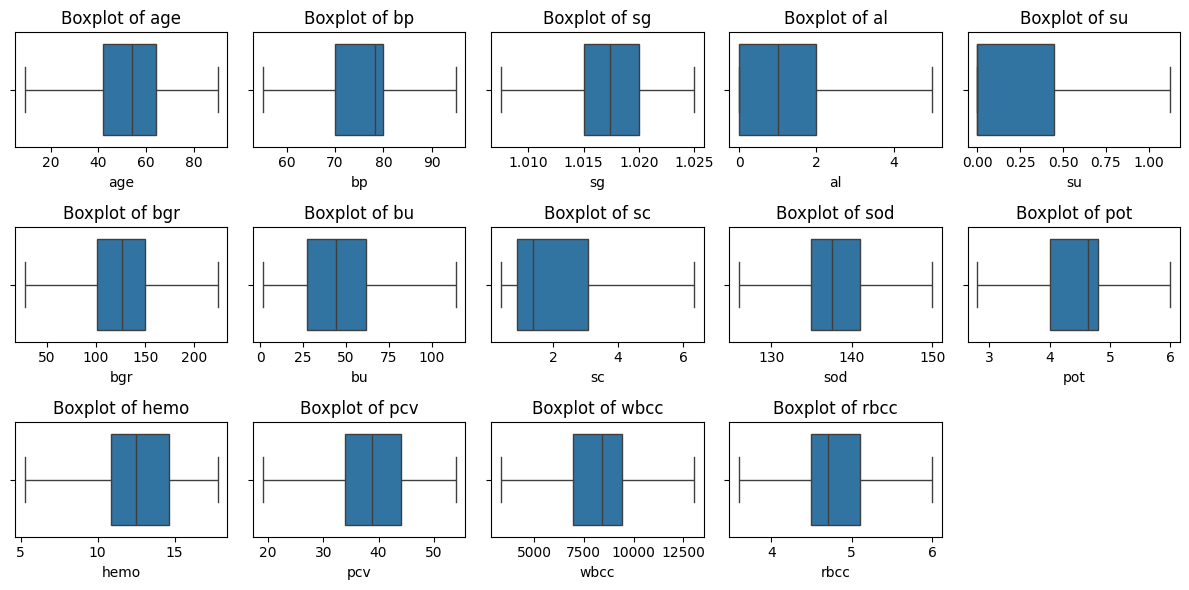

In [ ]:
# Visualize the distributions of numeric columns again
plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")

plt.tight_layout()
plt.show()

**Check and Clean Categorical Columns (Before Encoding)**

Inspect the unique values in categorical columns to identify inconsistencies or unexpected entries.

In [ ]:
# List of categorical features
categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane','target']

# Check unique values for each categorical features
for col in categorical_cols:
    print(f"Unique values in {col}: {df[col].unique()}")

Unique values in rbc: ['normal' 'abnormal']
Unique values in pc: ['normal' 'abnormal']
Unique values in pcc: ['notpresent' 'present']
Unique values in ba: ['notpresent' 'present']
Unique values in htn: ['yes' 'no']
Unique values in dm: ['yes' 'no' '\tno']
Unique values in cad: ['no' 'yes']
Unique values in appet: ['good' 'poor']
Unique values in pe: ['no' 'yes']
Unique values in ane: ['no' 'yes']
Unique values in target: ['ckd' 'ckd\t' 'notckd']


Issues Identified :

- `dm` column : The value `'\tno'` is present, which is likely caused by a tab character before the value `no`.
- `target` column: The value `'ckd\t'` has a tab character after the value `ckd`, causing inconsistency in the dataset.

Handle These Issues :

- Remove Leading/Trailing Whitespace:
  Strip any unwanted spaces, tabs, or newline characters from the values in the columns.
- `'\tno'` will be cleaned to `'no'`.
- `'ckd\t'` will be cleaned to `'ckd'`.

In [ ]:
# Strip leading/trailing whitespace from the relevant columns
df['dm'] = df['dm'].str.strip()
df['target'] = df['target'].str.strip()

print(f"Unique values in `dm`: {df['dm'].unique()}")
print(f"Unique values in `target`: {df['target'].unique()}")

Unique values in `dm`: ['yes' 'no']
Unique values in `target`: ['ckd' 'notckd']


**Convert Categorical Data to Numeric**

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane','target']

# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical features
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

print(df[categorical_cols].head())


   rbc  pc  pcc  ba  htn  dm  cad  appet  pe  ane  target
0    1   1    0   0    1   1    0      0   0    0       0
1    1   1    0   0    0   0    0      0   0    0       0
2    1   1    0   0    0   1    0      1   0    1       0
3    1   0    1   0    1   0    0      1   1    1       0
4    1   1    0   0    0   0    0      0   0    0       0


**Train-Test Split**

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.2, random_state=42)

**Feature Scaling / Normalization**

Perform normalization/standardization after the train-test split.

- Normalizing the entire dataset before splitting can lead to data leakage, where information from the test set influences the training process, resulting in biased performance estimates.
- The test set should evaluate how well the model generalizes to unseen data. Normalizing after splitting ensures that the test set remains independent of the training process.

In [ ]:
# Initialize the StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler (do not fit on test data)
X_test = scaler.transform(X_test)

##**Section 5: Building and Training the MLP Model**

In this section, we will build a Multilayer Perceptron (MLP) model using a feedforward neural network architecture. The MLP consists of an input layer, one hidden layer, and an output layer.

In [ ]:
class FFSNNetwork:

  def __init__(self, n_inputs, hidden_sizes=[2]):
    #intialize the inputs
    self.nx = n_inputs
    self.ny = 1
    self.nh = len(hidden_sizes)
    self.sizes = [self.nx] + hidden_sizes + [self.ny]

    self.W = {}
    self.B = {}
    for i in range(self.nh+1):
      self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
      self.B[i+1] = np.zeros((1, self.sizes[i+1]))

  def sigmoid(self, x):
    return 1.0/(1.0 + np.exp(-x))

  def forward_pass(self, x):
    self.A = {}
    self.H = {}
    self.H[0] = x.reshape(1, -1)
    for i in range(self.nh+1):
      self.A[i+1] = np.matmul(self.H[i], self.W[i+1]) + self.B[i+1]
      self.H[i+1] = self.sigmoid(self.A[i+1])
    return self.H[self.nh+1]

  def grad_sigmoid(self, x):
    return x*(1-x)

  def grad(self, x, y):
    self.forward_pass(x)
    self.dW = {}
    self.dB = {}
    self.dH = {}
    self.dA = {}
    L = self.nh + 1
    self.dA[L] = (self.H[L] - y)
    for k in range(L, 0, -1):
      self.dW[k] = np.matmul(self.H[k-1].T, self.dA[k])
      self.dB[k] = self.dA[k]
      self.dH[k-1] = np.matmul(self.dA[k], self.W[k].T)
      self.dA[k-1] = np.multiply(self.dH[k-1], self.grad_sigmoid(self.H[k-1]))

  def fit(self, X, Y, epochs=1, learning_rate=1, initialise=True, display_loss=False):

    # initialise w, b
    if initialise:
      for i in range(self.nh+1):
        self.W[i+1] = np.random.randn(self.sizes[i], self.sizes[i+1])
        self.B[i+1] = np.zeros((1, self.sizes[i+1]))

    if display_loss:
      loss = {}

    for e in tqdm(range(epochs), total=epochs, unit="epoch"):
      dW = {}
      dB = {}
      for i in range(self.nh+1):
        dW[i+1] = np.zeros((self.sizes[i], self.sizes[i+1]))
        dB[i+1] = np.zeros((1, self.sizes[i+1]))
      for x, y in zip(X, Y):
        self.grad(x, y)
        for i in range(self.nh+1):
          dW[i+1] += self.dW[i+1]
          dB[i+1] += self.dB[i+1]

      m = X.shape[1]
      for i in range(self.nh+1):
        self.W[i+1] -= learning_rate * dW[i+1] / m
        self.B[i+1] -= learning_rate * dB[i+1] / m

      if display_loss:
        Y_pred = self.predict(X)
        loss[e] = mean_squared_error(Y_pred, Y)

    if display_loss:
      plt.plot(loss.values())
      plt.title('Loss Function')
      plt.xlabel('Epochs')
      plt.ylabel('Mean Squared Error')
      plt.show()

  def predict(self, X):
    Y_pred = []
    for x in X:
      y_pred = self.forward_pass(x)
      Y_pred.append(y_pred)
    return np.array(Y_pred).squeeze()

##**Section 6: Training and Evaluation**

In this section, we:
- Train the model on the preprocessed training data.
- Evaluate the model's performance on the test set using accuracy, precision, recall, and F1-score.
- Visualize the results using a confusion matrix to show classification performance.

The feedforward neural network (FFNN) was set up with a single hidden layer comprising 14 neurons, utilizing the sigmoid activation function during the forward pass.
The network was trained with a learning rate of 0.01 over 2000 epochs.

  0%|          | 0/2000 [00:00<?, ?epoch/s]

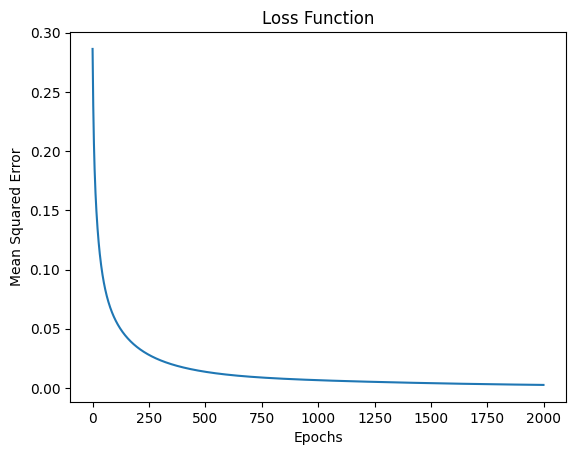

**Training accuracy: 1.0**

**Testing (Validation) accuracy: 0.99**


Classification Report(On Test Data) :-

               precision    recall  f1-score   support

           0       1.00      0.98      0.99        52
           1       0.97      1.00      0.98        28

    accuracy                           0.99        80
   macro avg       0.98      0.99      0.99        80
weighted avg       0.99      0.99      0.99        80



In [ ]:
from sklearn.metrics import accuracy_score

# Instantiate the model with 24 inputs and 1 hidden layer
ffsnn = FFSNNetwork(24, [14])

# Train the model
ffsnn.fit(X_train, y_train, epochs=2000, learning_rate=0.01, display_loss=True)

# Predict on training and testing data
y_pred_train = ffsnn.predict(X_train)
y_pred_binarised_train = (y_pred_train >= 0.5).astype("int").ravel()
y_pred_test = ffsnn.predict(X_test)
y_pred_binarised_test = (y_pred_test >= 0.5).astype("int").ravel()

# Calculate accuracy
accuracy_train = accuracy_score(y_pred_binarised_train, y_pred=y_train)
accuracy_test = accuracy_score(y_pred_binarised_test, y_test)

display(Markdown(f"**Training accuracy: {round(accuracy_train, 2)}**"))
display(Markdown(f"**Testing (Validation) accuracy: {round(accuracy_test, 2)}**"))

print(f"\nClassification Report(On Test Data) :-\n\n {classification_report(y_test, y_pred_binarised_test)}")


**Confusion Matrix**

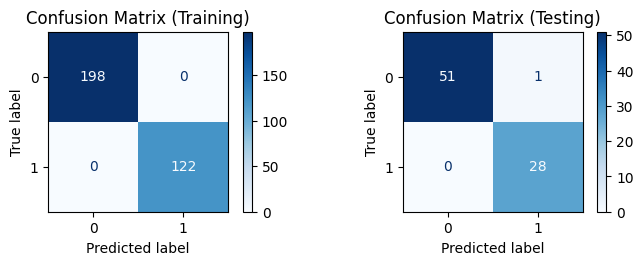

In [ ]:
# Calculate confusion matrices

conf_matrix_train = confusion_matrix(y_train, y_pred_binarised_train)
conf_matrix_test = confusion_matrix(y_test, y_pred_binarised_test)

disp_train = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_train)
disp_test = ConfusionMatrixDisplay(confusion_matrix=conf_matrix_test)


# Create a figure with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(5, 2))  # Adjust the size as needed

# Plot the confusion matrix for training
disp_train.plot(cmap='Blues', ax=ax1)
ax1.set_title('Confusion Matrix (Training)')

# Plot the confusion matrix for testing
disp_test.plot(cmap='Blues', ax=ax2)
ax2.set_title('Confusion Matrix (Testing)')

# Adjust the layout to minimize white space
plt.subplots_adjust(left=0.1, right=1.4, top=1, bottom=0.1)
plt.show()



##**Section 7:Effects of the number of hidden layers, neurons and standardizing the input attributes on the classification accuracy.**







### 1. Effect of Standardizing Input Attributes

**Raw Features:**
- If the features have different scales (e.g., some features range from 0 to 1 while others range from 1000 to 10000), the model might struggle to learn efficiently. Neural networks are sensitive to the scale of input features because they rely on gradient-based optimization, and features with large variances might dominate the learning process.


**Standardized Features:**
- Standardizing the input features (scaling them to have zero mean and unit variance) helps in speeding up the training process and improving the convergence of the model.
- Standardization is particularly important when using activation functions like sigmoid or tanh, as they are sensitive to the range of input values (e.g., values far from zero can saturate the function and slow down learning).

>**Standardized input data ensures that all features contribute equally to the model’s training process, leading to better optimization of weights and faster convergence.**


###2. Effect of Number of Neurons in the Hidden Layer
**Small Number of Neurons:**
- If the hidden layer contains too few neurons, the model might not have enough capacity to capture the complexity of the data, resulting in `underfitting`. This means the model might not perform well even on the training data.
-  Too Few Neurons: Insufficient capacity to learn the underlying patterns in the data, leading to underfitting.(Low)

**Large Number of Neurons:**
- On the other hand, having too many neurons might increase the model’s complexity and cause `overfitting`, where the model learns the noise in the data rather than the actual patterns. This can cause the model to perform well on the training data but poorly on unseen data (i.e., the model generalizes poorly).
- Too Many Neurons: Adds unnecessary complexity, increases computation time, and risks overfitting (again low testing accuracy).


>**Balanced neuron count ensures the model has sufficient capacity to learn meaningful representations without overfitting or underfitting.**


###3.Effect of Number of Hidden Layers

**Single Hidden Layer (shallow networks)**
- Too Few Layers: May not capture complex relationships in the data, leading to underfitting and poor classification accuracy.

**Multiple Hidden Layers (deep networks):**
- Too Many Layers: Increases computational cost, risks overfitting, and may cause vanishing or exploding gradient problems during training.

In summary, standardizing input features ensures faster and more efficient learning. Choosing the right number of neurons and hidden layers balances model performance, avoiding underfitting or overfitting while managing training time effectively.


                                                                                    -   END -